In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file and replacing'?' with NaN values. So that we can read the nan values easily
df=pd.read_csv("adult.csv",na_values=["?"])
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# Exploratory Data Analysis

In [3]:
#finding number of rows and column
df.shape

(32561, 15)

In [4]:
#finding names of the column
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
#finding datatype of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Observation: Here we observe that some of the datatypes are in object type. So we need to change it into int datatype.

In [6]:
#finding null values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

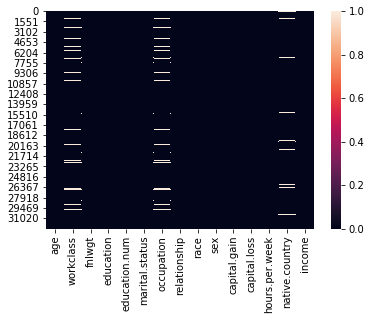

In [7]:
#visualizing null values
sns.heatmap(df.isnull())

Observation: Here we can observe that there are many null values present in columns of workclass, occupation,native country.

In [8]:
#getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#finding the number of unique value of each kind
df.nunique(dropna=True)

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [10]:
#Let us find the names of unique value in different columns
df['workclass'].unique()


array([nan, 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
df['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

In [12]:
df['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [13]:
df['capital.gain'].unique()


array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114], dtype=int64)

In [14]:
#let us look at statistical value of each column
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observation:Here we observe that there are alot of null values present in capital gain and capital loss. So its better to drop these two columns.

# Univariate Analysis

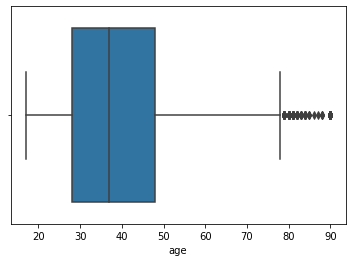

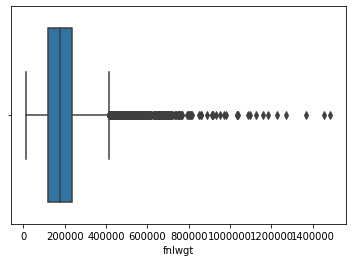

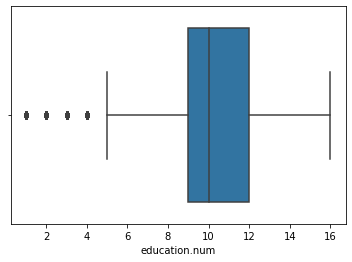

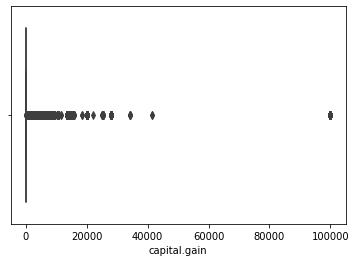

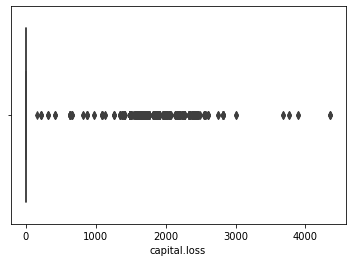

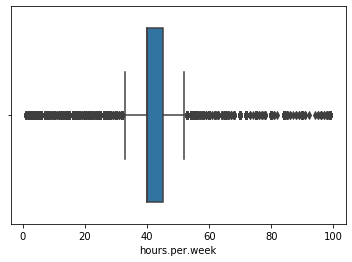

In [15]:
#Visualizing data by using boxplot
for i in df.describe().columns:
    sns.boxplot(df[i].dropna())
    plt.show()

Observation: Here we can see that there are many outliers in capital gain and capital loss

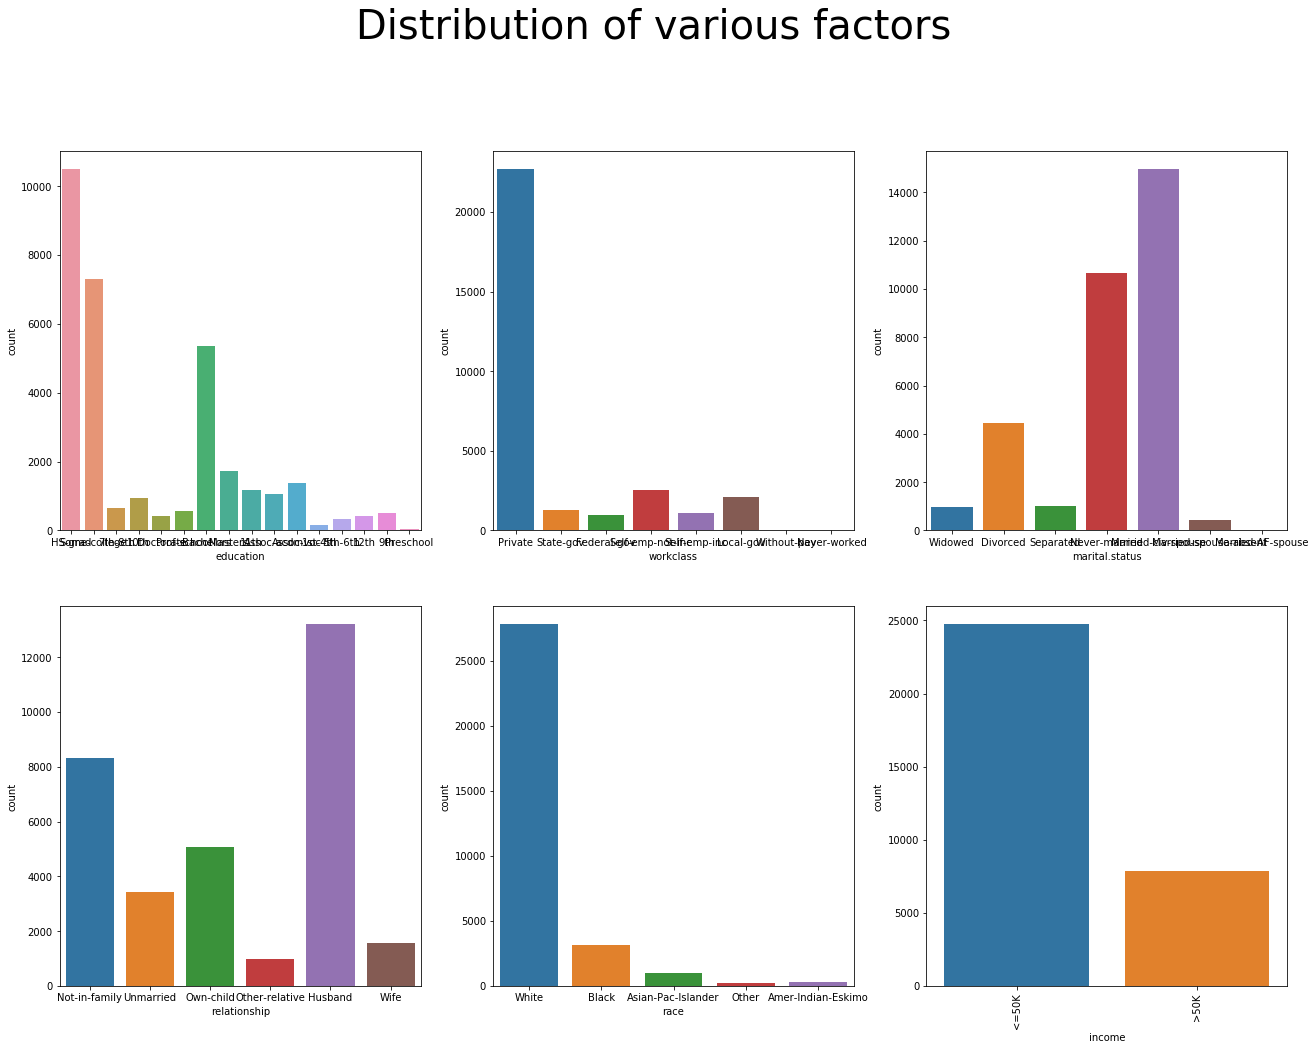

In [16]:
#visualizing each categorical attribute by using countplot
fig,ax = plt.subplots(2,3, figsize=(22,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=40)
sns.countplot(df['education'], ax = ax[0,0]) 
sns.countplot(df['workclass'], ax = ax[0,1]) 
sns.countplot(df['marital.status'], ax = ax[0,2]) 
sns.countplot(df['relationship'], ax = ax[1,0])
sns.countplot(df['race'], ax = ax[1,1])  
sns.countplot(df['income'], ax = ax[1,2]) 
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3)
plt.show()

Observation: Here we observe that majority of people are graduates.

Majority of people are doing job in private sector.

Majority of people are White

Majority of people are earning above 50K

# Bivariable Analysis

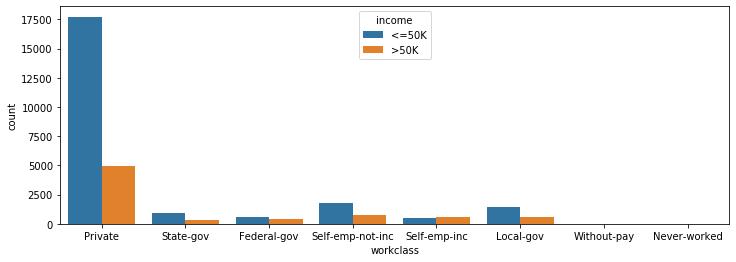

In [17]:
#Now let us visualize that how workclass impact on income
plt.subplots(figsize=(12,4))
sns.countplot(x='workclass',hue='income',data=df)

Observation:Here we observe that majority of people working in private job are getting more than 50K.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

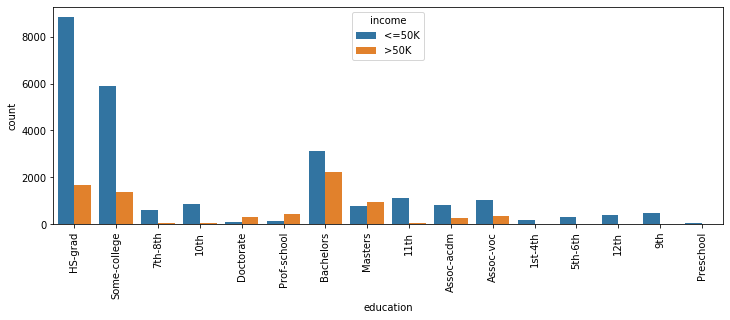

In [18]:
#Now let us visualize that how education impact on income
plt.subplots(figsize=(12,4))
sns.countplot(x='education',hue='income',data=df)
plt.xticks(rotation=90)

Observation: Here we observe that majority of people who are college pass out are earning more than 50K.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

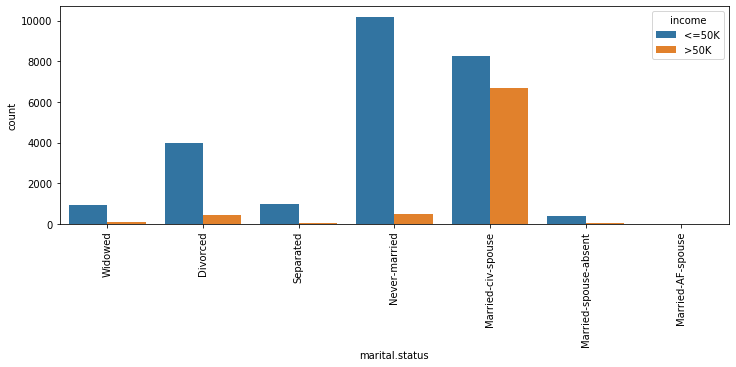

In [19]:
#Now let us visualize that how marital.status impact on income
plt.subplots(figsize=(12,4))
sns.countplot(x='marital.status',hue='income',data=df)
plt.xticks(rotation=90)

Observation: Here we observed that majority of divorced people,Never-married,separated,widowed are earning more than 50K. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

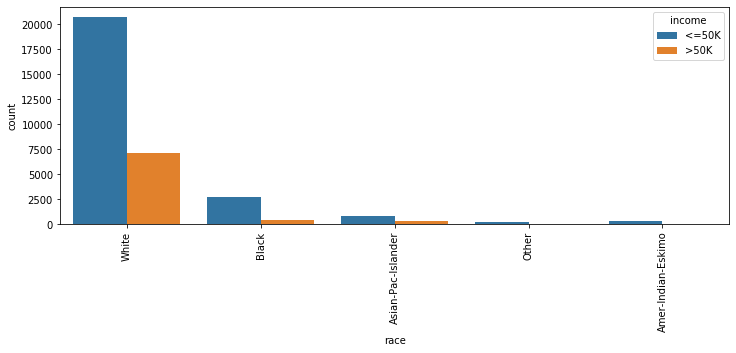

In [20]:
#Now let us visualize that how race impact on income
plt.subplots(figsize=(12,4))
sns.countplot(x='race',hue='income',data=df)
plt.xticks(rotation=90)

Observation:Here we can see that race is not impacting much on income.

In [21]:
#dropping null values 
df.dropna(inplace=True)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [22]:
#checking whether we have removed the null value or not
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Observation: Here education and education.num representing the same level. so we can drop one of them.

In [23]:
#finding correlation
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


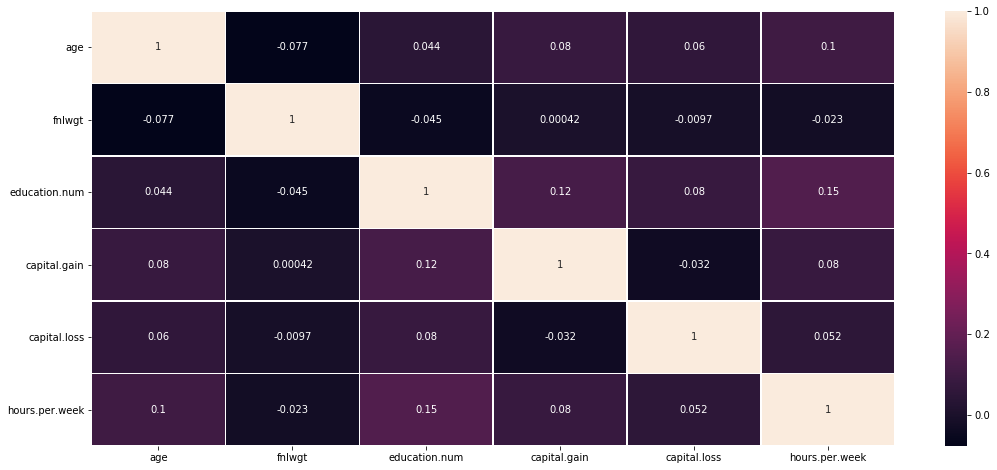

In [24]:
#visualization of correlation by using heatmap
plt.subplots(figsize=(18, 8))
sns.heatmap(df.corr(),annot=True,linewidths=.5)

In [25]:
#here education and education num column both play same role. So we can drop one of them
df.drop('education',axis=1,inplace=True)

In [26]:
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [27]:
#transforming the non-numeric data to numeric data by using label encoder
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=LabelEncoder().fit_transform(df[col])

In [28]:
df

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,65,2,6096,8,6,3,1,4,0,0,89,17,38,0
3,37,2,6564,3,0,6,4,4,0,0,88,39,38,0
4,24,2,15770,9,5,9,3,4,0,0,88,39,38,0
5,17,2,13278,8,0,7,4,4,0,0,87,44,38,0
6,21,2,7296,5,5,0,4,4,1,0,87,39,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,5,2,17375,9,4,10,1,4,1,0,0,39,38,0
32557,10,2,15471,11,2,12,5,4,0,0,0,37,38,0
32558,23,2,7555,8,2,6,0,4,1,0,0,39,38,1
32559,41,2,7377,8,6,0,4,4,0,0,0,39,38,0


In [29]:
#removing outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(30162, 14)
(25115, 14)


In [30]:
#splitting the data
x=df1.iloc[:,0:-1]
x

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1121,15,2,4418,8,2,3,0,4,1,0,32,59,38
1122,33,3,9332,8,2,2,0,4,1,0,32,59,38
1123,14,2,1817,9,2,7,0,4,1,0,32,49,38
1125,17,2,2619,8,2,2,0,4,1,0,32,39,38
1126,17,2,5187,10,2,6,0,4,1,0,32,49,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,5,2,17375,9,4,10,1,4,1,0,0,39,38
32557,10,2,15471,11,2,12,5,4,0,0,0,37,38
32558,23,2,7555,8,2,6,0,4,1,0,0,39,38
32559,41,2,7377,8,6,0,4,4,0,0,0,39,38


In [31]:
y=df1.iloc[:,-1]
y

1121     0
1122     0
1123     0
1125     0
1126     0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 25115, dtype: int32

In [32]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [33]:
#info gain
print(model.feature_importances_)

[0.18621014 0.05024443 0.2065444  0.13267057 0.07140282 0.09274709
 0.08657329 0.00917716 0.0259591  0.01623972 0.00633112 0.10692072
 0.00897944]


In [34]:
#dropping least correlated columns
x.drop(['capital.gain','race','native.country','sex'],axis=1,inplace=True)

In [35]:
#transforming the data by using standardScaler
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
x=scale.fit_transform(x)

In [36]:
#importing models and metrics from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [37]:
#finding best randomstate for train test split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=accuracy_score(y_test,y_pred)
        print("accuracy score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max accuracy score corresponding to",final_r_state,"is",max_r_score)  
    return final_r_state

In [38]:
#finding best random state
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
r_state=maxr2_score(regr,x,y)

accuracy score corresponding to 42 is 0.8228150507664742
accuracy score corresponding to 43 is 0.8248058928926936
accuracy score corresponding to 44 is 0.8174397770256818
accuracy score corresponding to 45 is 0.820226956002389
accuracy score corresponding to 46 is 0.82341230340434
accuracy score corresponding to 47 is 0.8198287875771452
accuracy score corresponding to 48 is 0.8216205454907426
accuracy score corresponding to 49 is 0.826796735018913
accuracy score corresponding to 50 is 0.8184351980887915
accuracy score corresponding to 51 is 0.8220187139159865
accuracy score corresponding to 52 is 0.8222177981286084
accuracy score corresponding to 53 is 0.8106709137965359
accuracy score corresponding to 54 is 0.807286482181963
accuracy score corresponding to 55 is 0.8100736611586701
accuracy score corresponding to 56 is 0.8232132191917181
accuracy score corresponding to 57 is 0.8216205454907426
accuracy score corresponding to 58 is 0.823611387616962
accuracy score corresponding to 59 is

In [42]:
#dividing the data into train and test by using train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=65)

In [43]:
#Importing models for classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Hyperparameter tunning by using GridSearchCV

In [44]:
#parameters for random forest
rfc = RandomForestClassifier()
param_grid = {
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

grid = GridSearchCV(rfc, param_grid, n_jobs=-1, cv=5)

grid.fit(x, y)
grid.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_split': 8,
 'n_estimators': 30}

In [45]:
#best parameters for AdaBoostClassifier
n_estimators={"n_estimators":range(1,25)}
adc=AdaBoostClassifier()
gadc=GridSearchCV(adc,n_estimators,cv=10)
gadc.fit(x,y)
gadc.best_params_

{'n_estimators': 24}

In [46]:
#best parameters for decisiontreeclassifier
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtc=DecisionTreeClassifier()    
gdtc=GridSearchCV(dtc, param_grid, cv=5)
gdtc.fit(x, y)
gdtc.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [47]:
#best parameters for support vector classifier
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.8436790762492535
rbf
{'C': 10, 'kernel': 'rbf'}


In [48]:
#best parameter for gradiantboosting classifier
n_estimators={"n_estimators":range(1,25)}
gbc=GradientBoostingClassifier()
gc=GridSearchCV(gbc,n_estimators,cv=10)
gc.fit(x,y)
gc.best_params_

{'n_estimators': 24}

In [49]:
#parameters for knn
neighbors={"n_neighbors":range(1,20)}
knc=KNeighborsClassifier()
gknc=GridSearchCV(knc,neighbors,cv=10)
gknc.fit(x,y)
gknc.best_params_

{'n_neighbors': 18}

In [54]:
#fitting best parameters
knc=KNeighborsClassifier(n_neighbors=18)
svc=SVC(C= 10, kernel='rbf')
dtc=DecisionTreeClassifier(criterion='gini', max_depth=5)
rfc=RandomForestClassifier(bootstrap= True, max_features='auto',min_samples_split= 8,n_estimators=30)
adc=AdaBoostClassifier(n_estimators=1)
gbc=GradientBoostingClassifier(n_estimators=24)
gb=GaussianNB()
lr=LogisticRegression()

In [55]:
#building different models
models=[]
models.append(('KNeighborsClassifier',knc))
models.append(('SupportVectorClassifier',svc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifierClassifier',adc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('GaussianNB',gb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('LogisticRegression',lr))

In [56]:
#importing models for cross_val_score, roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc

In [57]:
#applying for looping to run all the models in one go
Models=[]
score=[]
cvs=[]


for name,model in models:
    print('*****************',name,'**********************')
    print('\n')
    Models.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_score=',sc)
    cvs.append(sc*100)
    print('\n')    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    
    

***************** KNeighborsClassifier **********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


Accuracy_score= 0.8537821208830981


Cross_val_score= 0.8424059139784946


classification_report
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4451
           1       0.67      0.48      0.56      1075

    accuracy                           0.85      5526
   macro avg       0.78      0.71      0.74      5526
weighted avg       0.84      0.85      0.84      5526



[[4201  250]
 [ 558  517]]


***************** SupportVectorClassifier **********************


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    

In [58]:
result=pd.DataFrame({'Model':Models,'Accuracy_score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,85.378212,84.240591
1,SupportVectorClassifier,84.871516,84.312220
2,RandomForestClassifier,85.124864,84.535203
3,AdaBoostClassifierClassifier,80.546507,80.266775
4,DecisionTreeClassifier,84.853420,84.252515
5,GaussianNB,81.216069,80.983558
6,GradientBoostingClassifier,84.817228,84.224650
7,LogisticRegression,83.061889,82.201907


Observation: Here we observe that KneighborsClassifier gives better score. So we can finalize this as final model.

In [59]:
#saving the model
from sklearn.externals import joblib
joblib.dump(knc,'census_income.pkl')

['census_income.pkl']